In [260]:
setwd("C:/Users/yy/Desktop/2019-1st-ml-month-with-kakr")

In [261]:
train=read.csv("train.csv",stringsAsFactors=FALSE)
test=read.csv("test.csv",stringsAsFactors=FALSE)

In [262]:
head(train)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q


In [263]:
str(train)

'data.frame':	891 obs. of  12 variables:
 $ PassengerId: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : int  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass     : int  3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : chr  "Braund, Mr. Owen Harris" "Cumings, Mrs. John Bradley (Florence Briggs Thayer)" "Heikkinen, Miss. Laina" "Futrelle, Mrs. Jacques Heath (Lily May Peel)" ...
 $ Sex        : chr  "male" "female" "female" "female" ...
 $ Age        : num  22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp      : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : chr  "A/5 21171" "PC 17599" "STON/O2. 3101282" "113803" ...
 $ Fare       : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : chr  "" "C85" "" "C123" ...
 $ Embarked   : chr  "S" "C" "S" "S" ...


In [264]:
colSums(is.na(train))

PassengerId    Survived      Pclass        Name         Sex         Age 
          0           0           0           0           0         177 
      SibSp       Parch      Ticket        Fare       Cabin    Embarked 
          0           0           0           0           0           0

In [265]:
colSums(is.na(test))

PassengerId      Pclass        Name         Sex         Age       SibSp 
          0           0           0           0          86           0 
      Parch      Ticket        Fare       Cabin    Embarked 
          0           0           1           0           0

In [266]:
summary(train)

  PassengerId       Survived          Pclass          Name          
 Min.   :  1.0   Min.   :0.0000   Min.   :1.000   Length:891        
 1st Qu.:223.5   1st Qu.:0.0000   1st Qu.:2.000   Class :character  
 Median :446.0   Median :0.0000   Median :3.000   Mode  :character  
 Mean   :446.0   Mean   :0.3838   Mean   :2.309                     
 3rd Qu.:668.5   3rd Qu.:1.0000   3rd Qu.:3.000                     
 Max.   :891.0   Max.   :1.0000   Max.   :3.000                     
                                                                    
     Sex                 Age            SibSp           Parch       
 Length:891         Min.   : 0.42   Min.   :0.000   Min.   :0.0000  
 Class :character   1st Qu.:20.12   1st Qu.:0.000   1st Qu.:0.0000  
 Mode  :character   Median :28.00   Median :0.000   Median :0.0000  
                    Mean   :29.70   Mean   :0.523   Mean   :0.3816  
                    3rd Qu.:38.00   3rd Qu.:1.000   3rd Qu.:0.0000  
                    Max.   :80.00 

In [267]:
sapply(train, function(x) length(unique(x)))

PassengerId    Survived      Pclass        Name         Sex         Age 
        891           2           3         891           2          89 
      SibSp       Parch      Ticket        Fare       Cabin    Embarked 
          7           7         681         248         148           4

# EDA: Sex

In [268]:
library(dplyr)

In [269]:
table(train$Sex)


female   male 
   314    577 

In [270]:
train %>% group_by(Survived, Sex) %>% summarise(freq = n())

Survived,Sex,freq
0,female,81
0,male,468
1,female,233
1,male,109


In [271]:
prop.table(table(train$Sex,train$Survived),1) #여자들이 생존할 확률이 높음

        
                 0         1
  female 0.2579618 0.7420382
  male   0.8110919 0.1889081

# EDA: Pclass

In [272]:
table(train$Pclass)


  1   2   3 
216 184 491 

In [273]:
train %>% group_by(Survived, Pclass) %>% summarise(freq = n())

Survived,Pclass,freq
0,1,80
0,2,97
0,3,372
1,1,136
1,2,87
1,3,119


In [274]:
prop.table(table(train$Pclass,train$Survived),1) #사회적 지위가 높을수록 생존할 확률이 높음

   
            0         1
  1 0.3703704 0.6296296
  2 0.5271739 0.4728261
  3 0.7576375 0.2423625

# EDA: SibSp

In [275]:
table(train$SibSp)


  0   1   2   3   4   5   8 
608 209  28  16  18   5   7 

In [276]:
train %>% group_by(Survived, SibSp) %>% summarise(freq = n())

Survived,SibSp,freq
0,0,398
0,1,97
0,2,15
0,3,12
0,4,15
0,5,5
0,8,7
1,0,210
1,1,112
1,2,13


In [277]:
prop.table(table(train$SibSp,train$Survived),1) #배우자,형제자매가 많을수록 생존률이 떨어짐

   
            0         1
  0 0.6546053 0.3453947
  1 0.4641148 0.5358852
  2 0.5357143 0.4642857
  3 0.7500000 0.2500000
  4 0.8333333 0.1666667
  5 1.0000000 0.0000000
  8 1.0000000 0.0000000

# EDA: Parch

In [278]:
table(train$Parch)


  0   1   2   3   4   5   6 
678 118  80   5   4   5   1 

In [279]:
train %>% group_by(Survived, Parch) %>% summarise(freq = n())

Survived,Parch,freq
0,0,445
0,1,53
0,2,40
0,3,2
0,4,4
0,5,4
0,6,1
1,0,233
1,1,65
1,2,40


In [280]:
prop.table(table(train$Parch,train$Survived),1) #부모와 자녀를 1~3명 정도 동승했을 경우 생존률이 높음 

   
            0         1
  0 0.6563422 0.3436578
  1 0.4491525 0.5508475
  2 0.5000000 0.5000000
  3 0.4000000 0.6000000
  4 1.0000000 0.0000000
  5 0.8000000 0.2000000
  6 1.0000000 0.0000000

# EDA: Embarked

In [281]:
table(train$Embarked) #결측값 2개


      C   Q   S 
  2 168  77 644 

In [282]:
train %>% group_by(Survived, Embarked) %>% summarise(freq = n())

Survived,Embarked,freq
0,C,75
0,Q,47
0,S,427
1,,2
1,C,93
1,Q,30
1,S,217


In [283]:
prop.table(table(train$Embarked,train$Survived),1) #유일하게 C에서 탑승한 인원들만 생존률이 더 높다

   
            0         1
    0.0000000 1.0000000
  C 0.4464286 0.5535714
  Q 0.6103896 0.3896104
  S 0.6630435 0.3369565

# Feature engineering

In [284]:
full  <- bind_rows(train, test)

In [285]:
head(full)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q


Name을 보면  , Mr.와 같은 형태로 ,(공백)Mr.과 같은 형태로 구성되있다는 것을 확인

- Mr : 0  
- Miss : 1  
- Mrs: 2  
- Others: 3

In [286]:
library(stringr)
full$Title <- gsub('(.*,)|(\\..*)','', full$Name) 
# ','앞에 .*(모든문자)를 지워주세요
# \\.(마침표) 뒤에 .*(모든문자)를 지워주세요

In [287]:
head(full)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S,Mr
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C,Mrs
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S,Miss
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,Mrs
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S,Mr
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q,Mr


In [288]:
table(full$Title)


         Capt           Col           Don          Dona            Dr 
            1             4             1             1             8 
     Jonkheer          Lady         Major        Master          Miss 
            1             1             2            61           260 
         Mlle           Mme            Mr           Mrs            Ms 
            2             1           757           197             2 
          Rev           Sir  the Countess 
            8             1             1 

In [289]:
full$Title <- ifelse(full$Title == " Mr", 0, ifelse(full$Title == " Miss", 1, ifelse(full$Title == " Mrs", 2, 3)))

full$Title <- as.factor(full$Title)

In [290]:
head(full)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S,0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C,2
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,2
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S,0
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q,0


In [291]:
#Name 변수 제거
full <- full[, -4]

성별 범주화

In [292]:
full$Sex <- ifelse(full$Sex == "male" ,0 , 1)

full$Sex <- as.factor(full$Sex)

Fsize(가족의 수) 파생변수 생성 및 범주화

In [293]:
full$Fsize <- full$SibSp + full$Parch + 1

In [294]:
table(full$Fsize)


  1   2   3   4   5   6   7   8  11 
790 235 159  43  22  25  16   8  11 

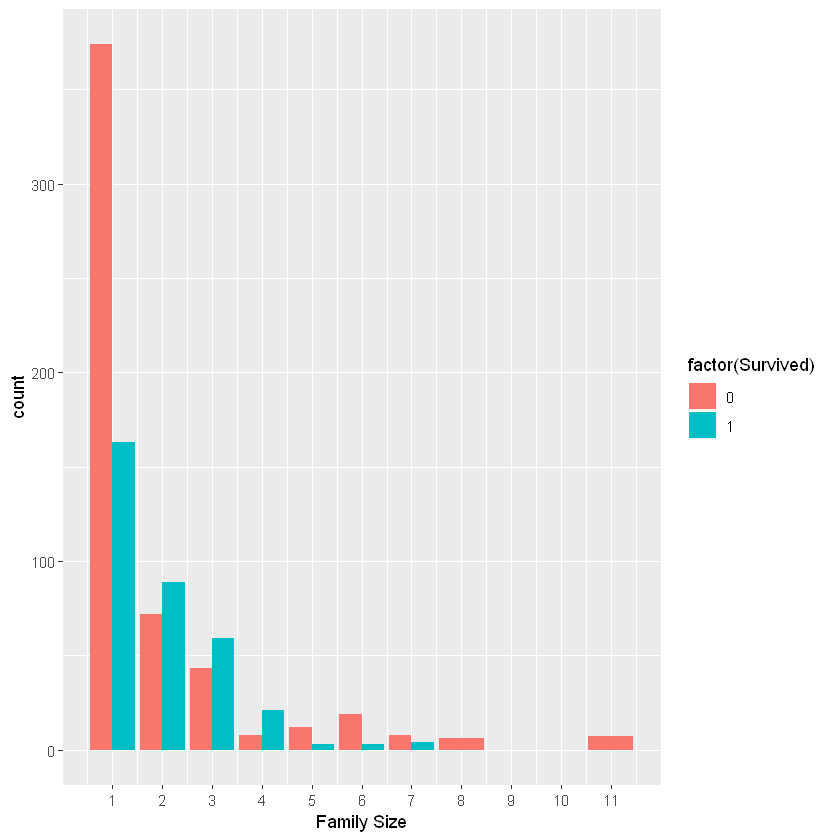

In [295]:
ggplot(full[1:891,], aes(x = Fsize, fill = factor(Survived))) +
  geom_bar(stat='count', position='dodge') +
  scale_x_continuous(breaks=c(1:11)) +
  labs(x = 'Family Size') 
# 가족의 수가 4명을 초과하면 생존이 매우 적어지는 것을 확인하였다.

In [296]:
full$Family[full$Fsize == 1] <- 'single'
full$Family[full$Fsize < 5 & full$Fsize > 1] <- 'small'
full$Family[full$Fsize > 4] <- 'large'

full$Family <- as.factor(full$Family)

In [297]:
table(full$Family)


 large single  small 
    82    790    437 

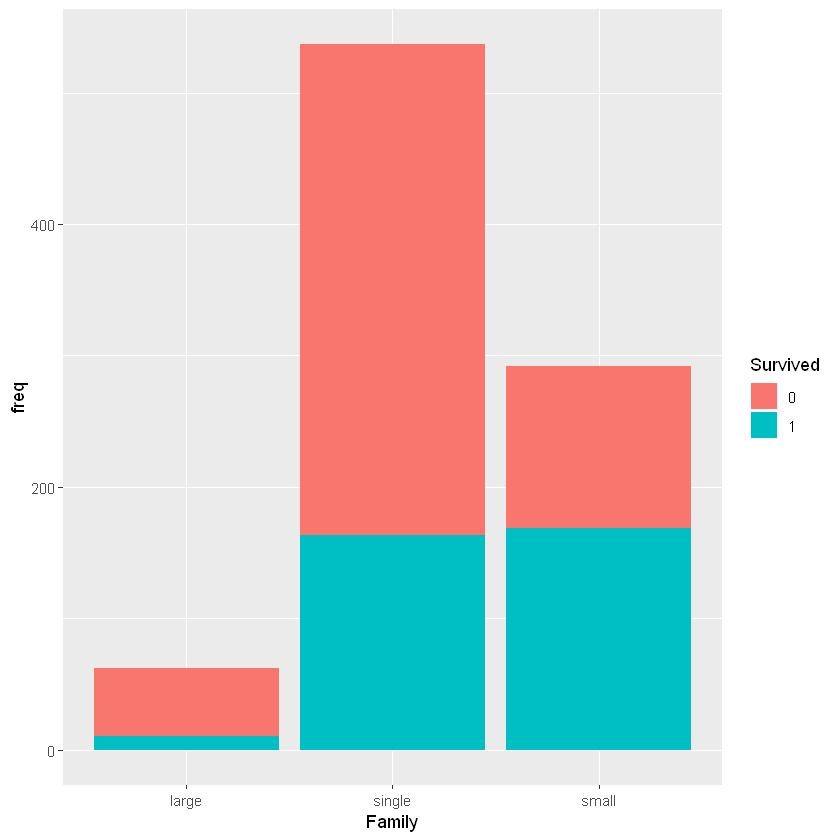

In [298]:
ggplot(full[1:891,], aes(x = Family, fill = factor(Survived))) +
  geom_bar() +
  labs(fill = 'Survived', x="Family", y="freq")

In [299]:
#SibSp, Parch, Fsize 변수 제거
full=  full  %>% select(-6,-7,-13)

In [300]:
head(full)

PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Title,Family
1,0,3,0,22,A/5 21171,7.2500,,S,0,small
2,1,1,1,38,PC 17599,71.2833,C85,C,2,small
3,1,3,1,26,STON/O2. 3101282,7.9250,,S,1,single
4,1,1,1,35,113803,53.1000,C123,S,2,small
5,0,3,0,35,373450,8.0500,,S,0,single
6,0,3,0,NA,330877,8.4583,,Q,0,single


Cabin(객실정보)에 따른 파생변수 생성

In [301]:
full$Cabin[1:28]

[1] ""            "C85"         ""            "C123"        ""           
 [6] ""            "E46"         ""            ""            ""           
[11] "G6"          "C103"        ""            ""            ""           
[16] ""            ""            ""            ""            ""           
[21] ""            "D56"         ""            "A6"          ""           
[26] ""            ""            "C23 C25 C27"

In [302]:
strsplit(full$Cabin[2], NULL)[[1]]

[1] "C" "8" "5"

In [303]:
full$Deck<-factor(sapply(full$Cabin, function(x) strsplit(x, NULL)[[1]][1]))

In [304]:
#Cabin 변수 제거
full=full[,-8]

In [305]:
head(full)

PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Embarked,Title,Family,Deck
1,0,3,0,22,A/5 21171,7.2500,S,0,small,NA
2,1,1,1,38,PC 17599,71.2833,C,2,small,C
3,1,3,1,26,STON/O2. 3101282,7.9250,S,1,single,NA
4,1,1,1,35,113803,53.1000,S,2,small,C
5,0,3,0,35,373450,8.0500,S,0,single,NA
6,0,3,0,NA,330877,8.4583,Q,0,single,NA


# Missing Value

In [306]:
colSums(is.na(full))

PassengerId    Survived      Pclass         Sex         Age      Ticket 
          0         418           0           0         263           0 
       Fare    Embarked       Title      Family        Deck 
          1           0           0           0        1014

Embarked(탑승항구) 결측치 처리

In [307]:
full  %>% filter(Embarked=="") #두개의 관측치 모두 Fare가 80이고, Pclass가 1임

PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Embarked,Title,Family,Deck
62,1,1,1,38,113572,80,,1,single,B
830,1,1,1,62,113572,80,,2,single,B


In [308]:
embark_fare= full  %>% filter(Embarked!="")

Warning message:
"Removed 1 rows containing non-finite values (stat_boxplot)."

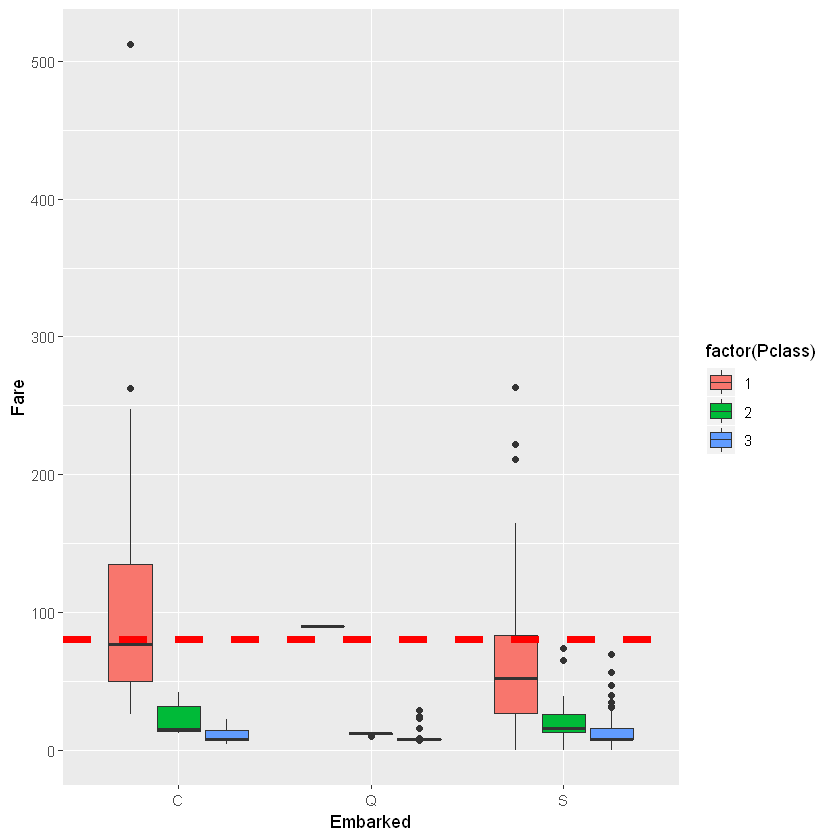

In [309]:
ggplot(embark_fare, aes(x = Embarked, y = Fare, fill = factor(Pclass))) +
  geom_boxplot() +
  geom_hline(aes(yintercept=80), 
    colour='red', linetype='dashed', lwd=2) +
  scale_y_continuous()

#fare가 80달러이면서 Pclass가 1인 승객들의 Embark는 C임

In [310]:
full$Embarked[c(62, 830)] <- 'C'

full[c(62, 830),] 

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Embarked,Title,Family,Deck
62,62,1,1,1,38,113572,80,C,1,single,B
830,830,1,1,1,62,113572,80,C,2,single,B


Fare(요금) 결측치 처리

In [311]:
full  %>% filter(is.na(full$Fare)) #Pclasss가 3이고, Embarked는 S임

PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Embarked,Title,Family,Deck
1044,NA,3,0,60.5,3701,NA,S,0,single,NA


In [312]:
full$Fare[1044] <- median(full[full$Pclass == '3' & full$Embarked == 'S', ]$Fare, na.rm = TRUE) #중앙값으로 결측치 처리

In [313]:
full[1044,]

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Embarked,Title,Family,Deck
1044,1044,NA,3,0,60.5,3701,8.05,S,0,single,NA


Age(나이) 결측치 처리

In [314]:
library(doBy)

In [315]:
summaryBy(Age ~ Title, data=full, FUN=c(mean, sd, median), na.rm=TRUE)

Title,Age.mean,Age.sd,Age.median
0,32.25215,12.42209,29.0
1,21.77424,12.24908,22.0
2,36.99412,12.90177,35.5
3,19.47741,19.89266,9.0


In [316]:
# Title별 Median Age를 통한 결측값 처리
full$Age <- ifelse((is.na(full$Age) & full$Title == 0), 29, full$Age)
full$Age <- ifelse((is.na(full$Age) & full$Title == 1), 22, full$Age)
full$Age <- ifelse((is.na(full$Age) & full$Title == 2), 35, full$Age)
full$Age <- ifelse((is.na(full$Age) & full$Title == 3), 9, full$Age)

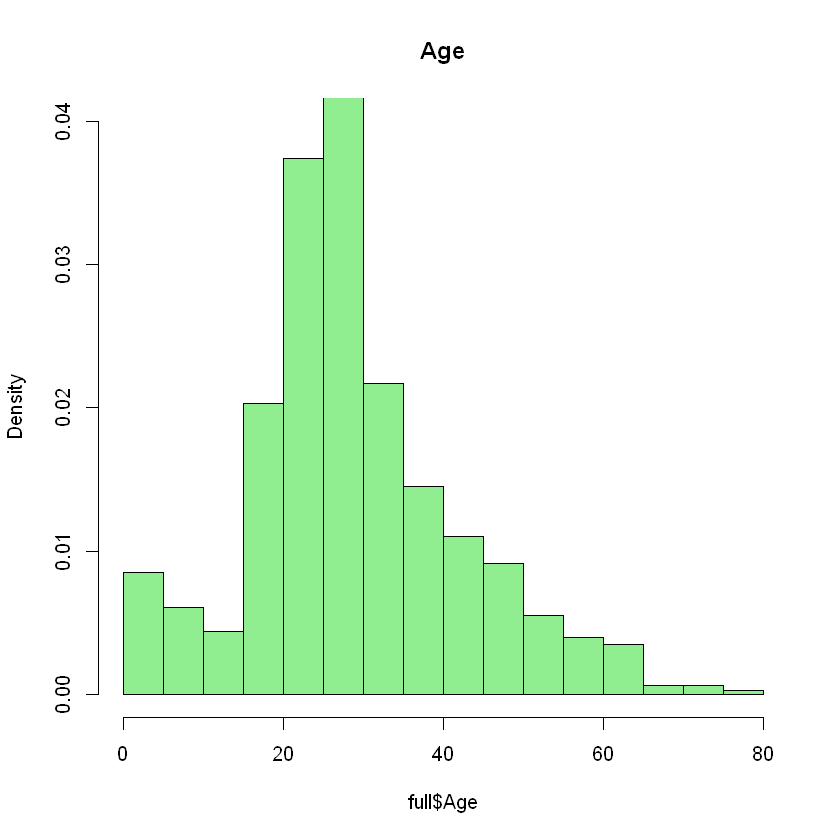

In [317]:
hist(full$Age, freq=F, main='Age',col='lightgreen', ylim=c(0,0.04))

-child: 18세 이하

-adult: 19세 이상 64세 이하

-senior: 65세 이상

In [318]:
full$Age <- ifelse(full$Age <= 18, "child",
                    ifelse(full$Age > 18 & full$Age <= 64, "adult","senior"))

In [319]:
table(full$Age)


 adult  child senior 
  1093    203     13 

# Predict

In [320]:
str(full)

'data.frame':	1309 obs. of  11 variables:
 $ PassengerId: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : int  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass     : int  3 1 3 1 3 3 1 3 3 2 ...
 $ Sex        : Factor w/ 2 levels "0","1": 1 2 2 2 1 1 1 1 2 2 ...
 $ Age        : chr  "adult" "adult" "adult" "adult" ...
 $ Ticket     : chr  "A/5 21171" "PC 17599" "STON/O2. 3101282" "113803" ...
 $ Fare       : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Embarked   : chr  "S" "C" "S" "S" ...
 $ Title      : Factor w/ 4 levels "0","1","2","3": 1 3 2 3 1 1 1 4 3 3 ...
 $ Family     : Factor w/ 3 levels "large","single",..: 3 3 2 3 2 2 2 1 3 3 ...
 $ Deck       : Factor w/ 8 levels "A","B","C","D",..: NA 3 NA 3 NA NA 5 NA NA NA ...


In [321]:
factor_vars <- c('PassengerId','Survived','Pclass','Age','Embarked')

full[factor_vars] <- lapply(full[factor_vars], function(x) as.factor(x))

In [322]:
str(full)

'data.frame':	1309 obs. of  11 variables:
 $ PassengerId: Factor w/ 1309 levels "1","2","3","4",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : Factor w/ 2 levels "0","1": 1 2 2 2 1 1 1 1 2 2 ...
 $ Pclass     : Factor w/ 3 levels "1","2","3": 3 1 3 1 3 3 1 3 3 2 ...
 $ Sex        : Factor w/ 2 levels "0","1": 1 2 2 2 1 1 1 1 2 2 ...
 $ Age        : Factor w/ 3 levels "adult","child",..: 1 1 1 1 1 1 1 2 1 2 ...
 $ Ticket     : chr  "A/5 21171" "PC 17599" "STON/O2. 3101282" "113803" ...
 $ Fare       : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Embarked   : Factor w/ 3 levels "C","Q","S": 3 1 3 3 3 2 3 3 3 1 ...
 $ Title      : Factor w/ 4 levels "0","1","2","3": 1 3 2 3 1 1 1 4 3 3 ...
 $ Family     : Factor w/ 3 levels "large","single",..: 3 3 2 3 2 2 2 1 3 3 ...
 $ Deck       : Factor w/ 8 levels "A","B","C","D",..: NA 3 NA 3 NA NA 5 NA NA NA ...


In [323]:
train <- full[1:891,]
test <- full[892:1309,]

In [324]:
library(randomForest)

In [325]:
set.seed(123)

# Build the model (note: not all possible variables are used)
rf_model <- randomForest(factor(Survived) ~ Pclass + Sex + Age + 
                                            Fare + Embarked + Title + 
                                            Family,
                                            data = train)

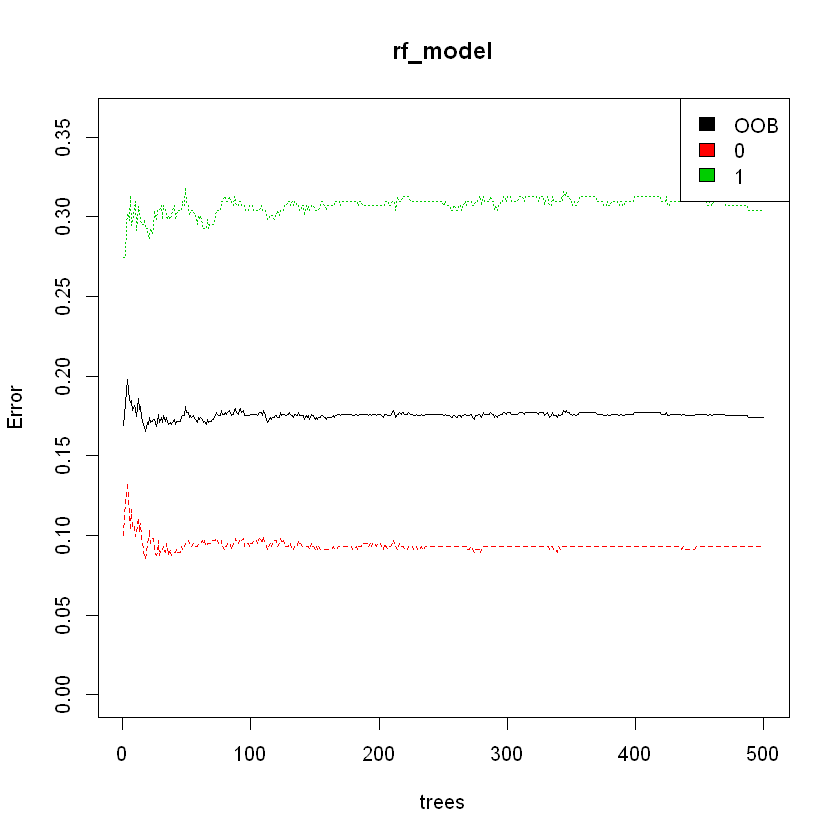

In [326]:
plot(rf_model, ylim=c(0,0.36))
legend('topright', colnames(rf_model$err.rate), col=1:3, fill=1:3)

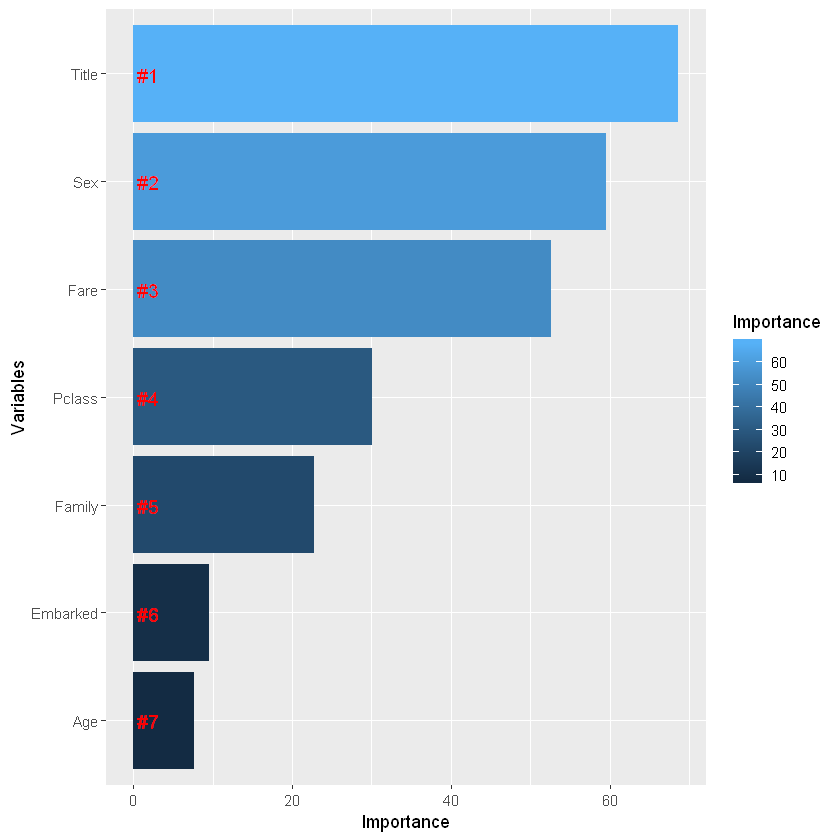

In [327]:
#변수 중요도
importance    <- importance(rf_model)
varImportance <- data.frame(Variables = row.names(importance), 
                            Importance = round(importance[ ,'MeanDecreaseGini'],2))

rankImportance <- varImportance %>%
  mutate(Rank = paste0('#',dense_rank(desc(Importance))))

ggplot(rankImportance, aes(x = reorder(Variables, Importance), 
    y = Importance, fill = Importance)) +
  geom_bar(stat='identity') + 
  geom_text(aes(x = Variables, y = 0.5, label = Rank),
    hjust=0, vjust=0.55, size = 4, colour = 'red') +
  labs(x = 'Variables') +
  coord_flip()

In [328]:
prediction <- predict(rf_model, test)

solution <- data.frame(PassengerID = test$PassengerId, Survived = prediction)

write.csv(solution, file = 'rf_mod_Solution.csv', row.names = F)

In [329]:
rf_model


Call:
 randomForest(formula = factor(Survived) ~ Pclass + Sex + Age +      Fare + Embarked + Title + Family, data = train) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 2

        OOB estimate of  error rate: 17.4%
Confusion matrix:
    0   1 class.error
0 498  51  0.09289617
1 104 238  0.30409357

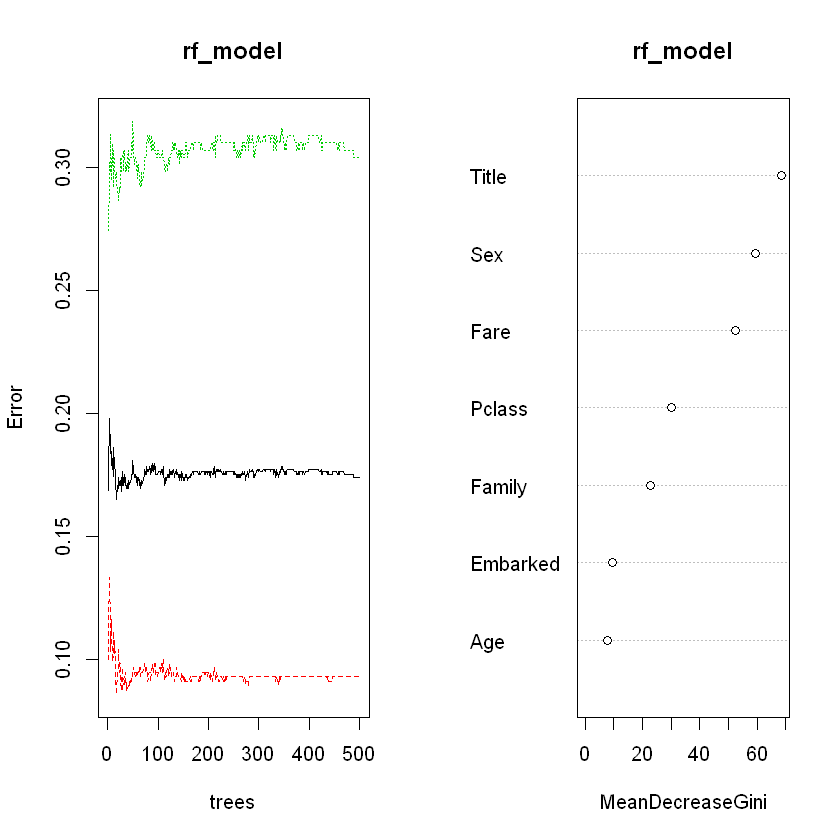

In [330]:
opar <- par(mfrow=c(1,2))
plot(rf_model)
varImpPlot(rf_model)